The men's volleyball team's average height of all these universities is 183.44 cm.

The tallest men volleyball players are:
                       Name  Heights
111         Will  Patterson   208.28
112          Mateusz Karpow   205.74
110          Patrick Rogers   200.66
96      Griffin Satterfield   200.66
55    Kyle Barriffe-Johnson   200.66
109  Braydon Savitski-Lynde   200.66
113         Peter  Zurawski   198.12
97          Trevor Phillips   198.12
98           Vanis Buckholz   198.12
99            Lucas Machado   198.12
100          Rodney Wallace   198.12
104               Dyer Ball   198.12
105             Eyal Rawitz   198.12
108   Tinaishe Ndavazocheva   198.12
34                Jason Lin   195.58
102              Ryan Bartz   195.58
70                Haoxin Hu   195.58
103           Marty Canavan   195.58

The shortest men volleyball players are:
                       Name  Heights
14              Chris  Mata   160.02
28          Dion  Csikortos   165.10
13  Joseph Gianfranc

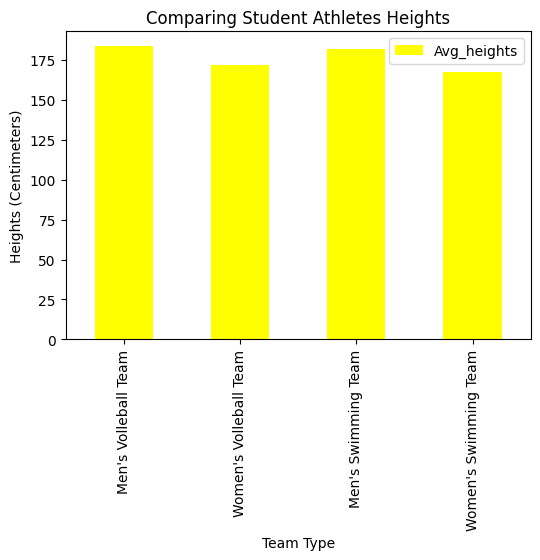

In [ ]:
#02/27/2023
#CIS 3120 HW#1 Part 1: Web Scraping

#Importing all the necessary libraires.
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#URL of all the website that needed to be scrapped. I will be using the grid view to scrape the height and name as it as easier to do so.
teams_list = {

    "men_volleyball_team_urls" : ["https://ccnyathletics.com/sports/mens-volleyball/roster?view=2", "https://lehmanathletics.com/sports/mens-volleyball/roster?view=2", "https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster?view=2",
                            "https://johnjayathletics.com/sports/mens-volleyball/roster?view=2", "https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster?view=2", "https://mecathletics.com/sports/mens-volleyball/roster?view=2"
                            "https://www.huntercollegeathletics.com/sports/mens-volleyball/roster?view=2", "https://yorkathletics.com/sports/mens-volleyball/roster", "https://ballstatesports.com/sports/mens-volleyball/roster?view=2"],

    "women_volleyball_team_urls" : ["https://bmccathletics.com/sports/womens-volleyball/roster?view=2", "https://yorkathletics.com/sports/womens-volleyball/roster", "https://hostosathletics.com/sports/womens-volleyball/roster?view=2",
                              "https://bronxbroncos.com/sports/womens-volleyball/roster/2021?view=2", "https://queensknights.com/sports/womens-volleyball/roster?view=2", "https://augustajags.com/sports/wvball/roster?view=2",
                              "https://flaglerathletics.com/sports/womens-volleyball/roster?view=2", "https://pacersports.com/sports/womens-volleyball/roster", "https://www.golhu.com/sports/womens-volleyball/roster?view=2"],

    "men_swimming_team_urls" : ["https://csidolphins.com/sports/mens-swimming-and-diving/roster?view=2", "https://yorkathletics.com/sports/mens-swimming-and-diving/roster", "https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster?view=2",
                          "https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster?view=2", "https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster?view=2", "https://mckbearcats.com/sports/mens-swimming-and-diving/roster?view=2",
                          "https://ramapoathletics.com/sports/mens-swimming-and-diving/roster?view=2", "https://oneontaathletics.com/sports/mens-swimming-and-diving/roster?view=2", "https://bubearcats.com/sports/mens-swimming-and-diving/roster/2023-24?view=2",
                          "https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22?view=2"],

    "women_swimming_team_urls" : ["https://csidolphins.com/sports/womens-swimming-and-diving/roster?view=2", "https://queensknights.com/sports/womens-swimming-and-diving/roster?view=2", "https://yorkathletics.com/sports/womens-swimming-and-diving/roster",
                            "https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2023-24?view=2", "https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster/2022-23?view=2", "https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster?view=2",
                            "https://mckbearcats.com/sports/womens-swimming-and-diving/roster?view=2", "https://ramapoathletics.com/sports/womens-swimming-and-diving/roster?view=2", "https://keanathletics.com/sports/womens-swimming-and-diving/roster?view=2",
                            "https://oneontaathletics.com/sports/womens-swimming-and-diving/roster?view=2"]

}


#The function below take the list of websites and scrapes all the heights from the lists of websites. We will repeat this for the other sets of websites.
#I used the split function to help me seperate the feet and inches by seperating
#each height in the website into seperate parts of the list like 6-3 into ['6', '1'] and assign them to the feet and inches
#variable respectively. Then, we converted the height into inches and then into centimeters.
#I used a similar method taught in class to do it. We will be creating a seperate dataframe for each website and at the end we make one big large dataframe.
#We will also find the average of each website and use it to replace the nan values of it for each of the website.

def output_dataframes(websites):
    frames = []  # List to store all the dataframes
    for website in websites:
        name=[]
        height = []
        page = requests.get(website)
        if page.status_code == 200: #To see if the website is responding to our request.
            soup = BeautifulSoup(page.content, "html.parser")
            height_tags = soup.find_all("td", class_='height') #find all the tags of each website with "td" and with a class of "height"
            for heights in height_tags:
                try: #Using the try method to see if we can parse the heights of the players because we had some websites where there are not values.
                    feet = int(heights.get_text().split("-")[0]) #slicing to get the first part of the height.
                    inches = int(heights.get_text().split("-")[1]) #slicing to get the second part of the height.
                    total_inches = feet * 12 + inches
                    centimeter = total_inches * 2.54
                    height.append(round(centimeter, 2))
                except: #If not and we scrap nothing, it will append the numpy no value sign to the list.
                    height.append(np.nan)
            name_tags = soup.find_all("td", class_="sidearm-table-player-name") #find all the tags of each website with "td" and with a class of where the player name is located in.
            for names in name_tags:
                name.append(names.get_text().strip()) #Gets rid of the trailing and beginning whitespaces.
            teams = {
                "Name": name,
                "Heights" : height
            } #Storing all the list in a series so that we can create the dataframe.
            teams_df = pd.DataFrame(teams) #Creating the dataframe for each url.
            avg_height_per_team = teams_df["Heights"].mean() #Find the average height of each team per website.
            teams_df["Heights"] = teams_df["Heights"].fillna(value= avg_height_per_team) #replacing all the nan values with the average height.
            frames.append(teams_df)
        else:
            print("This website is not avaiable.")
    merged_dataframe = pd.concat(frames, ignore_index=True) #Add all the dataframes in the list and add them all up into one merged dataframe.
    return merged_dataframe

#The function below will take the merged dataframe that we got from the output_dataframes function and return
#the mean of that one big dataframe from one of the sports teams.
#Using .loc on summary to find the row where the mean is located and output the value.
#I had to add Heights as another parameter or else it would out something like Heights    183.46 Name: mean, dtype: float64
#which is not something we want.
def average_height_of_team(dataframe, csv_file_name):
    summary = dataframe.describe() #Using describe to find the count, mean, std, etc of the dataframe
    mean_values = summary.loc["mean", "Heights"]
    dataframe.to_csv(csv_file_name, index=False) #Make the csv and name it uniquely to each team.
    return mean_values

#The function below take a parameter of the merged dataframes of each of the atheletic team and return the top 5 tallest unique players
#Including duplicates.
#At first I had to drop all the duplicates in the dataframes first so I can get the unique ones.
#So I used drop_duplicates to do this.
#I specifically told it to target heights as that is what we are looking for
#I got it from using https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
#Then the .nlargest(5, "Heights") sort the dataframe by heights and in descending order.
#I got this from using https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html
#I used the filter mask function to return which height in the orginal dataframe have the heights in the
#unique_tallest_heights["Heights"]. You have to specifiy the heights or else it would return nothing since we have the names
#and heights of the players in the unique_tallest_heights.
#Then I used the loc function to return all the names and heights from the filter mask values that equals True
#True in this case means it matches one of the unique tallest heights
#I then reurn the result and sorted it by descending order using the sort_values.
def tallest_athletes(dataframe):
    unique_tallest_heights = dataframe.drop_duplicates(subset="Heights").nlargest(5, "Heights") #nlargest is bascially equivalent to dataframe.sort_values(columns, ascending=False).head(n)
    filter_mask = dataframe["Heights"].isin(unique_tallest_heights["Heights"])
    result = dataframe.loc[filter_mask] #Had to use ChatGPT to help me with the syntax errors as it wasn't returning the name and heights.
    return result.sort_values("Heights", ascending=False)

#The function below take a parameter of the merged dataframes of each of the atheletic team and return the top 5 smallest unique players
#Including duplicates.
#At first I had to drop all the duplicates in the dataframes first so I can get the unique ones.
#So I used drop_duplicates to do this.
#I specifically told it to target heights as that is what we are looking for
#I got it from using https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
#Then the .nsmallest(5, "Heights") sort the dataframe by heights and in descending order.
#I got this from using https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nsmallest.html
#I used the filter mask function to return which height in the orginal dataframe have the heights in the
#unique_smallest_heights["Heights"]. You have to specifiy the heights or else it would return nothing since we have the names
#and heights of the players in the unique_smallest_heights.
#Then I used the loc function to return all the names and heights from the filter mask values that equals True
#True in this case means it matches one of the unique smallest heights
#I then reurn the result and sorted it by ascending order using the sort_values.
def shortest_athletes(dataframe):
    unique_shortest_heights = dataframe.drop_duplicates(subset="Heights").nsmallest(5, "Heights") #nsmallest is bascially equivalent to dataframe.sort_values(columns, ascending=True).head(n)
    filter_mask = dataframe["Heights"].isin(unique_shortest_heights["Heights"])
    result = dataframe.loc[filter_mask] #Had to use ChatGPT to help me with the syntax errors as it wasn't returning the name and heights.
    return result.sort_values("Heights", ascending=True)

#The main function that will print out all the average heights of each team with the csv file.
#For each of the print statement, you would first input all the urls in the list into the
#Output_dataframes functions to find all the heights and names of the players and merge them together into one big dataframe.
#Then it will be put into the average_height_of_team function so that it can output the file name of the csv and the average then.
#Then we would round the centimeter in the hundredth place.
#We would also be printing out tallest and shortest athletes using the merged dataframe
#The main function would also make a bar graph on the the average height of all the teams.
def main():
    men_volleyball_team_df = output_dataframes(teams_list['men_volleyball_team_urls'])
    avg_men_volleyball_team = round(average_height_of_team(men_volleyball_team_df, 'men_volleyball_team.csv'), 2)
    print(f"The men's volleyball team's average height of all these universities is {avg_men_volleyball_team} cm.\n")
    print(f"The tallest men volleyball players are:\n{tallest_athletes(men_volleyball_team_df)}\n")
    print(f"The shortest men volleyball players are:\n{shortest_athletes(men_volleyball_team_df)}\n")

    women_volleyball_team_df = output_dataframes(teams_list['women_volleyball_team_urls'])
    avg_women_volleyball_team = round(average_height_of_team(women_volleyball_team_df, 'women_volleyball_team.csv'), 2)
    print(f"The women's volleyball team's average height of all these universities is {avg_women_volleyball_team} cm.\n")
    print(f"The tallest women volleyball players are:\n{tallest_athletes(women_volleyball_team_df)}\n")
    print(f"The shortest women volleyball players are:\n{shortest_athletes(women_volleyball_team_df)}\n")

    men_swimming_team_df = output_dataframes(teams_list['men_swimming_team_urls'])
    avg_men_swimming_team = round(average_height_of_team(men_swimming_team_df, 'men_swimming_team.csv'), 2)
    print(f"The men's swimming team's average height of all these universities is {avg_men_swimming_team} cm.\n")
    print(f"The tallest men swimming players are:\n{tallest_athletes(men_swimming_team_df)}\n")
    print(f"The shortest men swmming players are:\n{shortest_athletes(men_swimming_team_df)}\n")

    women_swimming_team_df = output_dataframes(teams_list['women_swimming_team_urls'])
    avg_women_swimming_team = round(average_height_of_team(women_swimming_team_df, 'women_swimming_team.csv'), 2)
    print(f"The women's swimming team's average height of all these universities is {avg_women_swimming_team} cm.\n")
    print(f"The tallest women swimming players are:\n{tallest_athletes(women_swimming_team_df)}\n")
    print(f"The shortest women swimming players are:\n{shortest_athletes(women_swimming_team_df)}\n")

    #Making a new dataframe of the names of the teams and the average height of each team to create a bar graph.
    team_type_list = ["Men's Volleball Team", "Women's Volleball Team", "Men's Swimming Team", "Women's Swimming Team"]
    avg_heights_list = [avg_men_volleyball_team, avg_women_volleyball_team, avg_men_swimming_team, avg_women_swimming_team]
    bar_graph_df = pd.DataFrame({
        'Team Type': team_type_list,
        'Avg_heights' : avg_heights_list
    })
    #The kind of graph would be a bar graph with the x-axis being the Team Type key and the y-axis being the Avg_heights key with the color being yellow.
    bar_graph_df.plot(kind='bar', x='Team Type', y = 'Avg_heights', color='yellow', figsize=(6,4))
    plt.xlabel('Team Type') #Name of the x-axis
    plt.ylabel('Heights (Centimeters)') #Name of the y-axis
    plt.title('Comparing Student Athletes Heights') #Title of the graph
    plt.show() #Showing the graph

main()

